# Profiling

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ARCTraining/swd6_hpp/blob/master/docs/01_profiling.ipynb)

In [1]:
# if you're using colab, then install the required modules
import sys

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    %pip install --quiet line_profiler snakeviz pyinstrument eliot eliot-tree

[Profiling](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) analyses your code in terms of speed or memory. 

This helps identify where the bottlenecks are (_why and where is it slow?_) and how much potential there is for improvement.

```{note}
IPython magic commands are useful, commonly used commands in Jupyter Notebooks.  
They have one `%` at the start for use on a single line, or two `%%` at the start for use over a whole cell.  
```

## [`timeit`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit)

An [IPython magic command](https://jakevdp.github.io/PythonDataScienceHandbook/01.03-magic-commands.html) that measures the time execution of an expression. 

It runs a few times, depending on how intensive the expression is, and returns the average time with a standard deviation. It is useful for benchmarking small code snippets.

```{tip}
`timeit` is different to `time`, which is a less optimised alternative.  We recommend the use of `timeit`.  
```

In [2]:
%timeit range(100)

56.7 ns ± 0.18 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [3]:
%%timeit
for x in range(100):
    pass

726 ns ± 9.36 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Another option is:

## [`line_profiler`](https://github.com/pyutils/line_profiler)

This is module that measures the time spent in each line of a function. A simple example:

In [4]:
%load_ext line_profiler

In [5]:
import time


def relax():
    pass


def bottleneck():
    time.sleep(0.001)


def some_function():
    nums = [num for num in range(1_000)]
    bigger_nums = [num**2 for num in nums]
    bottleneck()
    bigger_nums.extend(bigger_nums)
    relax()

The `Timer unit` is the conversion to seconds.  

The table shows the following columns for each line of the function (each row):  
- `Line #`: The line number.
- `Hits`: The number of times that line was called.
- `Time`: The total time spent calling that line (in the `Timer units`).
- `Per Hit`: The time spent for one call of that line.
- `% Time`: The percentage of total time spent on that line (this is the often the most useful column).
- `Line Contents`: The source code for that line.

In [6]:
%lprun -f some_function some_function()

```{note}
In Colab, the results will pop up at the bottom under "Help", rather than inline like we have for a local Jupyter Notebook.
```

We can see that most of the time was in the `bottleneck()` call, highlighting the potential here for possible improvements.

## [`SnakeViz`](https://jiffyclub.github.io/snakeviz/)

`SnakeViz` visualises the output from `cProfile` in nice interactive plots.

[`cProfile`](https://docs.python.org/3/library/profile.html) is part of the Python standard library. It's a deterministic profiler of wallclock time (producing the same output for the same input).  It is for serial code (not parallel, which we'll cover later).  

However, the output has lots of tabular information that isn't ideal.  Every function call gets measured in seconds (each row). For example:

In [7]:
import cProfile

In [8]:
cProfile.run("some_function()")

         10 function calls in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.001    0.001 3630047074.py:12(some_function)
        1    0.000    0.000    0.000    0.000 3630047074.py:13(<listcomp>)
        1    0.000    0.000    0.000    0.000 3630047074.py:14(<listcomp>)
        1    0.000    0.000    0.000    0.000 3630047074.py:4(relax)
        1    0.000    0.000    0.001    0.001 3630047074.py:8(bottleneck)
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
        1    0.001    0.001    0.001    0.001 {built-in method time.sleep}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 {method 'extend' of 'list' objects}




Instead, visualising this output in `SnakeViz` is easier to interpret.

You can switch between the two styles using the "Style" dropdown.

**Style: Icicle**

- Functions are represented by rectangles.
- The root function is the _top-most rectangle_, with functions it calls below it, then the functions those call below them, and so on.
- The amount of time spent inside a function is represented by the width of the rectangle.
    - A big rectangle that stretches across most of the visualization represents a function that is taking up most of the time of its calling function, while a small rectangle represents a function that is using hardly any time at all.

**Style: Sunburst**

- Functions are represented by arcs.
- The root function is the _centre circle_, with functions it calls around it, then the functions those functions call around that, and so on. 
- The amount of time spent inside a function is represented by how far around the circle the arc goes.
    - An big arc that wraps most of the way around the circle represents a function that is taking up most of the time of its calling function, while a small arc represents a function that is using hardly any time at all.

```{warning}
`SnakeViz` doesn't currently work with Colab. Please, see the demonstrators results or use it in a local Jupyter Notebook.
```

In [9]:
%load_ext snakeviz

In [10]:
# %%snakeviz
# some_function()

## [`pyinstrument`](https://pyinstrument.readthedocs.io/en/latest/home.html)

A statistical profiler of wall-clock time (recording the call stack every 1ms), lowering the overhead compared to tracing profilers (like `cProfile`).

It hides library frames and fast functions, so you can focus on the slow parts of your code.

The output shows a tree of actions of *how* the function executes, using a traffic light colour legend (i.e., red = slow).

In [11]:
%load_ext pyinstrument

_     ._   __/__   _ _  _  _ _/_   Recorded: 11:38:10  Samples:  1
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.001     CPU time: 0.001
/   _/                      v5.0.0

Cell [12]

0.001 ZMQInteractiveShell.run_code  IPython/core/interactiveshell.py:3514
`- 0.001 <module>  /tmp/ipykernel_24631/701083101.py:4
   `- 0.001 some_function  /tmp/ipykernel_24631/3630047074.py:12
      `- 0.001 bottleneck  /tmp/ipykernel_24631/3630047074.py:8
         `- 0.001 sleep  <built-in>
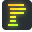

In [12]:
%%pyinstrument
some_function()

## [`Eliot`](https://eliot.readthedocs.io/en/stable/index.html)

Logs the performance information. It tracks each function called, its arguments, the return values, and any rasied exceptions. Hence, it can be helpful for profiling in real use cases.

```{note}
Logging has a higher overhead than `cProfile`.
```

It works by using decorators. Decorators are a nice way for functions to return other functions.

So:

```python
@f1
def f2(): 
  pass
```

Is the same as:

```python
def f2(): 
  pass 

f2 = f1(f2)
```

For example, here is a decorated function that logs calls to a function:

In [13]:
def log_calls(function):
    def wrapper():
        name = function.__name__

        print(f"Before {name} was called ...")
        function()
        print(f"After {name} was called ...")

    return wrapper

Calling this returns a function:

In [14]:
log_calls(some_function)

<function __main__.log_calls.<locals>.wrapper()>

So, to execute it we add `()`:

In [15]:
log_calls(some_function)()

Before some_function was called ...
After some_function was called ...


The `@wrapper` syntax is a nice way to return this same result, where the outer function is placed above the inner function with the `@` symbol:

In [16]:
@log_calls
def some_function_with_logging():
    some_function()

In [17]:
some_function_with_logging()

Before some_function_with_logging was called ...
After some_function_with_logging was called ...


Okay, so now we can use the `@eliot.log_call` decorator to profile a function:

In [18]:
import eliot

In [19]:
def bottleneck():
    time.sleep(0.5)

In [20]:
@eliot.log_call
def multiply(x, y):
    bottleneck()
    return x * y

In [21]:
@eliot.log_call
def add(x, y):
    return x + y

This next cell is just to remove the log file, if you're trying different things:

In [22]:
# remove file if exists
import os

try:
    os.remove("profiling_some_function.log")
except OSError:
    pass

Now, tell `eliot` where to log the output messages and run the function call:

In [23]:
eliot.to_file(open("profiling_some_function.log", "w+"))
result = multiply(add(3, 4), add(5, 6))

You can now view this log file by calling `eliot-tree` from a terminal.  

This shows that `add()` was called twice as inputs to `multiply()`.  

The input and output arguments are shown too.  

The time of the call is shown to the right, where `multiply()` took 0.5 seconds (due to the `time.sleep(0.5)` call).  

```{note}
You can call terminal commands from within a Jupyter Notebook cell by adding the prefix `!`.
```

In [24]:
!eliot-tree profiling_some_function.log

f3b9357e-9d1c-4a5f-a7d6-6d5434ad2dc5
└── __main__.add/1 ⇒ started 2024-11-05 11:38:11Z ⧖ 0.000s
    ├── x: 3
    ├── y: 4
    └── __main__.add/2 ⇒ succeeded 2024-11-05 11:38:11Z
        └── result: 7

5a8d8e25-173f-43d5-8bcf-b8e0086e2886
└── __main__.add/1 ⇒ started 2024-11-05 11:38:11Z ⧖ 0.000s
    ├── x: 5
    ├── y: 6
    └── __main__.add/2 ⇒ succeeded 2024-11-05 11:38:11Z
        └── result: 11

a958efec-0dac-4819-a00b-8125628aab24
└── __main__.multiply/1 ⇒ started 2024-11-05 11:38:11Z ⧖ 0.518s
    ├── x: 7
    ├── y: 11
    └── __main__.multiply/2 ⇒ succeeded 2024-11-05 11:38:11Z
        └── result: 77



Visualising how Python handles functions can be helpful in understanding them.

Click [here](https://pythontutor.com/composingprograms.html#code=def%20multiply%28x,%20y%29%3A%0A%20%20%20%20return%20x%20*%20y%0A%0Adef%20add%28x,%20y%29%3A%0A%20%20%20%20return%20x%20%2B%20y%0A%0Amultiply%28add%283,%204%29,%20add%285,%206%29%29&cumulative=true&curInstr=0&mode=display&origin=composingprograms.js&py=3&rawInputLstJSON=%5B%5D) to see an example.

## Exercises

```{admonition} Exercise 1

What is profiling and why is it useful?

```

```{admonition} Exercise 2

What profiling tool times the execution of a cell in a Jupyter Notebook?

```

```{admonition} Exercise 3

Below are two approaches for filling up an empty NumPy array.  Which approach is faster and why?

```

In [25]:
def fill_array_approach_1(n):
    array = np.empty(1)

    for index in range(n):
        new_point = np.random.rand()
        array = np.append(array, new_point)

    return array

In [26]:
def fill_array_approach_2(n):
    array = np.empty(n)

    for index in range(len(array)):
        new_point = np.random.rand()
        array[index] = new_point

    return array

```{admonition} Exercise 4

Below are two methods that find two numbers from an array of unique integers that add up to a target sum.  

If the target can't be made, then an empty list is returned.  

Each element in the array can only be used once.  

Which method is faster and why?

```

In [27]:
def two_sum_brute_force(array, target):
    """
    A brute force approach to find two numbers from an array that add up to a target.

    Steps
    1. Loop through the array twice, adding up pairs of array elements.
    2. Compare each of these sums to the target.
    3. Return the pair that sums to the target, if one exists.
    """
    for index_one in range(len(array)):
        for index_two in range(index_one + 1, len(array)):
            if (
                array[index_one] + array[index_two] == target  # check sum of pair
                and index_one != index_two  # can't use the same element twice
            ):
                return [index_one, index_two]  # return the target pair

    return []  # return an empty list if the target pair isn't found

In [28]:
def two_sum_cache(array, target):
    """
    Use caching to find two numbers from an array that add up to a target.

    Steps
    1. Create a dictionary of cached differences relative to the target sum.
    2. Loop through the array once, adding each index and difference to the cache.
    3. If the required difference of a new array element is already in the cache,
       then you've found a matching pair, which you can return.
    """
    cache_differences = {}
    for index, element in enumerate(array):
        difference = (
            target - element
        )  # calculate the target difference for this element
        if difference in cache_differences:  # if we have the matching pair
            return [index, cache_differences[difference]]  # return the target pair
        cache_differences[element] = index  # if we don't have a match, add to the cache

    return []  # return an empty list if the target pair isn't found

You can test them out using the following array and target:

In [29]:
import numpy as np

array = np.random.choice(1_000, 500, replace=False)
target = 250

## {ref}`Solutions <profiling>`

## Key Points

```{important}

- [x] _Measure the time of cells, functions, and programs to find bottlenecks e.g., using [`timeit`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit) and [`line_profiler`](https://github.com/pyutils/line_profiler)._
- [x] _Visualise the profiled code e.g., using [`SnakeViz`](https://jiffyclub.github.io/snakeviz/) and [`pyinstrument`](https://github.com/joerick/pyinstrument/)._
- [x] _Log profiling information e.g., using [`Eliot`](https://eliot.readthedocs.io/en/stable/index.html)._
- [x] _Consider how fast the code could go e.g., Big O notation._

```

## Further information

### Other options

- [`pyheat`](https://github.com/csurfer/pyheat)
    - Combines `pprofile` and `matplotlib` to show a heatmap of the profiled code.
- [`VizTracer`](https://github.com/gaogaotiantian/viztracer)
  - A low-overhead logging/debugging/profiling tool that can trace and visualise your python code execution.

#### Memory profiling

- [`memory_profiler`](https://github.com/pythonprofilers/memory_profiler)
  - Measures the memory used by a function, at its peak and the overall increment.
- [`memray`](https://github.com/bloomberg/memray)
    - Memray is a memory profiler for Python, generating several different types of reports to help you analyse the captured memory usage data. 
  
### Resources

- [Beyond `cProfile`: Choosing the right tool for performance optimisation](https://pythonspeed.com/articles/beyond-cprofile/)